In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_json("scout_car.json",lines=True)

In [5]:
df.describe()

,price,kW
count,15919.000000,0.0
mean,18019.896727,NaN
std,7386.169409,NaN
min,13.000000,NaN
25%,12850.000000,NaN
50%,16900.000000,NaN
75%,21900.000000,NaN
max,74600.000000,NaN


In [6]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [7]:
df2=df[['make_model', 'short_description', 'price','km', 'hp', 'Type', 'Make', 'Model',"Previous Owners",'Offer Number', 'First Registration','Body Color','Body', 'Nr. of Doors', 'Gearing Type', 'Displacement','Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption','Gears']]

df.columns

In [8]:
df2

,make_model,short_description,price,km,hp,Type,Make,Model,Previous Owners,Offer Number,...,Body,Nr. of Doors,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,Gears
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,"56,013 km",66 kW,"[, Used, , Diesel (Particulate Filter)]",\nAudi\n,"[\n, A1, \n]",\n2\n,[\nLR-062483\n],...,"[\n, Sedans, \n]",[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN
1,Audi A1,1.8 TFSI sport,14500,"80,000 km",141 kW,"[, Used, , Gasoline]",\nAudi\n,"[\n, A1, \n]",NaN,NaN,...,"[\n, Sedans, \n]",[\n3\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n7\n]
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,"83,450 km",85 kW,"[, Used, , Diesel (Particulate Filter)]",\nAudi\n,"[\n, A1, \n]",\n1\n,[\nAM-95365\n],...,"[\n, Sedans, \n]",[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN
3,Audi A1,1.4 TDi Design S tronic,14500,"73,000 km",66 kW,"[, Used, , Diesel (Particulate Filter)]",\nAudi\n,"[\n, A1, \n]",\n1\n,NaN,...,"[\n, Sedans, \n]",[\n3\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n6\n]
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,"16,200 km",66 kW,"[, Used, , Diesel (Particulate Filter)]",\nAudi\n,"[\n, A1, \n]",\n1\n,[\nC1626\n],...,"[\n, Sedans, \n]",[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,39950,- km,147 kW,"[, New, , Diesel (Particulate Filter)]",\nRenault\n,"[\n, Espace, \n]",NaN,[\n10988301\n],...,"[\n, Van, \n]",[\n5\n],"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n6\n]
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",39885,"9,900 km",165 kW,"[, Used, , Super 95 / Super Plus 98 (Particula...",\nRenault\n,"[\n, Espace, \n]","[\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...",[\n507370_3223\n],...,"[\n, Van, \n]",[\n5\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,708 kg\n]",[\nfront\n],"[\n, Super 95 / Super Plus 98 (Particulate Fil...","[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...",[\n7\n]
15916,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,39875,15 km,146 kW,"[, Pre-registered, , Diesel]",\nRenault\n,"[\n, Espace, \n]","[\n1\n, \n139 g CO2/km (comb)\n]",[\nEspace16\n],...,"[\n, Van, \n]",[\n5\n],"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n6\n]
15917,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",39700,10 km,147 kW,"[, Pre-registered, , Diesel]",\nRenault\n,"[\n, Espace, \n]",NaN,[\n2691331\n],...,"[\n, Van, \n]",[\n5\n],"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n6\n]


In [9]:
df2.columns

Index(['make_model', 'short_description', 'price', 'km', 'hp', 'Type', 'Make',
       'Model', 'Previous Owners', 'Offer Number', 'First Registration',
       'Body Color', 'Body', 'Nr. of Doors', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption', 'Gears'],
      dtype='object')

In [10]:
del df2["Type"]

## FUEL TEMİZLİĞİ

In [11]:
df2["Fuel"]

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object

In [12]:
df2.iloc[15915]["Fuel"][1]

'Super 95 / Super Plus 98 (Particulate Filter)'

In [13]:
df2["Fuel"]=df2['Fuel'].apply(lambda s:s[1])

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\1825060546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fuel"]=df2['Fuel'].apply(lambda s:s[1])


In [14]:
df2['Fuel'].str.contains('Diesel')

0         True
1        False
2         True
3         True
4         True
         ...  
15914     True
15915    False
15916     True
15917     True
15918    False
Name: Fuel, Length: 15919, dtype: bool

In [15]:
df2.loc[df2['Fuel'].str.contains('Diesel'), 'Fuel'] = 'Diesel'

In [16]:
df2.loc[df2['Fuel'].str.contains('Electric'), 'Fuel'] = 'Electric/Gasolin'

In [17]:
df2.loc[df2['Fuel'].str.contains('Super|Benzine|Gasoline'), 'Fuel'] = 'Gasoline'


In [18]:
df2.Fuel.unique()

array(['Diesel', 'Gasoline', 'Others', 'CNG', 'Electric/Gasolin',
       'CNG (Particulate Filter)', 'Others (Particulate Filter)',
       'Biogas', 'Domestic gas H', 'LPG', 'Liquid petroleum gas (LPG)'],
      dtype=object)

In [19]:
df2.Fuel.value_counts()

Gasoline                       8545
Diesel                         7299
CNG                              33
LPG                              16
Liquid petroleum gas (LPG)       10
Others                            5
Electric/Gasolin                  5
CNG (Particulate Filter)          3
Others (Particulate Filter)       1
Biogas                            1
Domestic gas H                    1
Name: Fuel, dtype: int64

In [20]:
df2[~((df2.Fuel== 'Gasoline')|(df2.Fuel== 'Diesel'))]   # ~ ısaretı degılı demektır.

,make_model,short_description,price,km,hp,Make,Model,Previous Owners,Offer Number,First Registration,...,Body,Nr. of Doors,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,Gears
819,Audi A1,1.4TDI Sportback /Euro6 /Navi /SHZ /PDC,14388,"25,684 km",66 kW,\nAudi\n,"[\n, A1, \n]",\n1\n,[\n0185N\n],"[\n, 2016, \n]",...,"[\n, Sedans, \n]",[\n5\n],"[\n, Manual, \n]","[\n1,422 cc\n]",NaN,NaN,[\nfront\n],Others,NaN,[\n5\n]
2647,Audi A3,SPORTBACK 1.4 TFSI g-tron S tronic Ambiente,18150,"95,117 km",81 kW,\nAudi\n,"[\n, A3, \n]",\n1\n,[\n2727316\n],"[\n, 2016, \n]",...,"[\n, Sedans, \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,CNG,NaN,NaN
2648,Audi A3,SPORTBACK 1.4 TFSI g-tron S tronic Ambiente,18150,"95,117 km",81 kW,\nAudi\n,"[\n, A3, \n]",\n1\n,[\n2727316\n],"[\n, 2016, \n]",...,"[\n, Sedans, \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,CNG,NaN,NaN
2649,Audi A3,SPORTBACK 1.4 TFSI g-tron S tronic Ambiente,18150,"95,117 km",81 kW,\nAudi\n,"[\n, A3, \n]",\n1\n,[\n2727316\n],"[\n, 2016, \n]",...,"[\n, Sedans, \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,CNG,NaN,NaN
2650,Audi A3,SPORTBACK 1.4 TFSI g-tron S tronic Ambiente,18150,"95,117 km",81 kW,\nAudi\n,"[\n, A3, \n]",\n1\n,[\n2727316\n],"[\n, 2016, \n]",...,"[\n, Sedans, \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,CNG,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,Renault Clio,TCe 90 GPL 5 porte Moschino Zen,9900,- km,66 kW,\nRenault\n,"[\n, Clio, \n]",NaN,[\n1691177\n],"[\n, 2019, \n]",...,"[\n, Sedans, \n]",[\n5\n],"[\n, Manual, \n]",[\n898 cc\n],[\n3\n],"[\n1,224 kg\n]",[\nfront\n],LPG,"[[6.1 l/100 km (comb)], [7.8 l/100 km (city)],...",[\n5\n]
14216,Renault Clio,TCe 12V 90 CV GPL Start,9500,"71,500 km",66 kW,\nRenault\n,"[\n, Clio, \n]",NaN,NaN,"[\n, 2017, \n]",...,"[\n, Sedans, \n]",[\n5\n],"[\n, Manual, \n]",[\n898 cc\n],[\n3\n],"[\n1,115 kg\n]",NaN,LPG,"[[], [], [5.1 l/100 km (country)]]",[\n5\n]
14500,Renault Clio,TCe Energy GLP Limited 66kW 90CV,10800,"13,000 km",66 kW,\nRenault\n,"[\n, Clio, \n]",\n1\n,NaN,"[\n, 2018, \n]",...,"[\n, Sedans, \n]",[\n5\n],"[\n, Manual, \n]",[\n898 cc\n],[\n3\n],"[\n1,082 kg\n]",[\nfront\n],Others,"[[4.7 l/100 km (comb)], [5.7 l/100 km (city)],...",[\n5\n]
14557,Renault Clio,TCe 12V 90 CV GPL Start,10500,"17,000 km",66 kW,\nRenault\n,"[\n, Clio, \n]",\n1\n,NaN,"[\n, 2018, \n]",...,"[\n, Sedans, \n]",[\n5\n],"[\n, Manual, \n]",[\n898 cc\n],[\n3\n],"[\n1,115 kg\n]",[\nfront\n],Liquid petroleum gas (LPG),"[[], [], [5.1 l/100 km (country)]]",[\n5\n]


In [21]:
df2.loc[df2[~((df2.Fuel== 'Gasoline')|(df2.Fuel== 'Diesel'))].index,'Fuel']='Others'

In [22]:
df2.Fuel.value_counts(dropna=False)     #  dropna=False   Nan degerlerınde sayısını verır.

Gasoline    8545
Diesel      7299
Others        75
Name: Fuel, dtype: int64

In [23]:
df2=df2.drop(columns=['Offer Number', "Model"])

In [24]:
df2.isnull().sum().sort_values()

make_model               0
price                    0
km                       0
hp                       0
Make                     0
Fuel                     0
Gearing Type             0
short_description       46
Body                    60
Nr. of Doors           212
Displacement           496
Body Color             597
First Registration    1597
Consumption           1906
Gears                 4712
Cylinders             5680
Previous Owners       6640
Drive chain           6858
Weight                6974
dtype: int64

## short_description TEMİZLİĞİ

In [25]:
df2['short_description'].unique()

array(['Sportback 1.4 TDI S-tronic Xenon Navi Klima', '1.8 TFSI sport',
       'Sportback 1.6 TDI S tronic Einparkhilfe plus+music', ...,
       'ELYSEE ENERGY dCi 160 EDC',
       'INITIALE Paris TCe 225 EDC GPF ACC EU6',
       'TCe 225 EDC GPF LIM Deluxe Pano,RFK'], dtype=object)

In [26]:
df.short_description.sort_values()

10871     1,6 CDTI**NAVI*Klimaaut*Tempomat*EURO6*TÜV NEU
9798                            1.4 75 cv5 porte b-color
3209                        1.4 TFSI Attraction (125 CV)
3203                        1.4 TFSI Attraction (125 CV)
2995                        1.4 TFSI Attraction (125 CV)
                              ...                       
14207                                               None
15003                                               None
15099                                               None
15364                                               None
15368                                               None
Name: short_description, Length: 15919, dtype: object

In [27]:
df2.iloc[15915]["short_description"]

'TCe 225 EDC GPF LIM Deluxe Pano,RFK'

In [28]:
df2["short_description"].value_counts()

SPB 1.6 TDI 116 CV S tronic Sport                 64
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
SPB 30 TFSI S tronic Admired                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10001, dtype: int64

In [29]:
df2["First Registration"].iloc[[1,2,3,4]]


1    [\n, 2017, \n]
2    [\n, 2016, \n]
3    [\n, 2016, \n]
4    [\n, 2016, \n]
Name: First Registration, dtype: object

In [30]:
def düzenle(e):

  try:
      return e[1]                 #int(e[1])-->baştan yaparsak fonk. dan sonra yapılarak astype gerek kalmaz.....
  except:
      return e

In [31]:
df2['First Registration'].apply(düzenle)

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [32]:
df2['First Registration']=df2['First Registration'].apply(düzenle)

In [33]:
df2['First Registration'] = pd.to_numeric(df2['First Registration'], errors='coerce') ## String sütunları Floata çevirdim.

In [34]:
df2.groupby('km')["First Registration"].sum()

km
- km         375494.0
0 km              0.0
1 km         446169.0
1,000 km      92871.0
1,001 km       8075.0
               ...   
99,999 km      2016.0
990 km         4037.0
991 km         2018.0
995 km         2019.0
999 km         6057.0
Name: First Registration, Length: 6690, dtype: float64

In [35]:
df2['First Registration'].mean()

2017.457617651166

In [36]:
df2["First Registration"].describe()

count    14322.000000
mean      2017.457618
std          1.076917
min       2016.000000
25%       2016.000000
50%       2018.000000
75%       2018.000000
max       2019.000000
Name: First Registration, dtype: float64

In [37]:
a_index=df2[df2['First Registration'].isnull()].index

In [38]:
a_index

Int64Index([  122,   710,   734,   741,   743,   869,   892,   946,   960,
              974,
            ...
            15884, 15885, 15888, 15890, 15892, 15896, 15902, 15907, 15912,
            15914],
           dtype='int64', length=1597)

In [39]:
for i in  df2[df2['First Registration'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].iloc[i]) & (df2['hp'] == df2['hp'].iloc[i]) & (df2['Body'] == df2['Body'].iloc[i])]=df2['First Registration'].mode()[0]
        
       df2['First Registration'].iloc[i] = a
        
    except:
        df2['First Registration'].iloc[i] = 2017

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2075496866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['First Registration'].iloc[i] = 2017
C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2075496866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['First Registration'].iloc[i] = 2017
C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2075496866.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['First Registr

import result                                 ## burada re.sub kullanımı örneği ile işimiz kolaylaştı

phone_no = '(212)-456-7890'
pattern = '\D'
result = re.sub(pattern, '',phone_no)

print(result)

In [40]:
df2['First Registration'].value_counts()

2017.0    4870
2018.0    4522
2016.0    3674
2019.0    2853
Name: First Registration, dtype: int64

In [41]:
df2['First Registration']

0        2016.0
1        2017.0
2        2016.0
3        2016.0
4        2016.0
          ...  
15914    2017.0
15915    2019.0
15916    2019.0
15917    2019.0
15918    2019.0
Name: First Registration, Length: 15919, dtype: float64

## # hp olan sütunu kw larını bulmak-boş satırlarını TEMİZLEME

In [42]:
df2["hp"].isnull().sum()

0

In [43]:
df2['hp'].isnull().index

RangeIndex(start=0, stop=15919, step=1)

In [44]:
df2["kW"]=df2.hp = df2.hp.apply(lambda s: s.strip('kW '))

In [45]:
df2.drop(columns=['hp'],  inplace= True)

In [46]:
df2["hp"]=df2["kW"]

In [47]:
df2["kW"].isnull().sum()

0

In [48]:
df2["kW"].head(60)

0      66
1     141
2      85
3      66
4      66
5      85
6      85
7      66
8      85
9      70
10     85
11     92
12     92
13    112
14     70
15     85
16     85
17     66
18     70
19     85
20     85
21     92
22     92
23     85
24     70
25     70
26     70
27     70
28     66
29     70
30     66
31     66
32     70
33     66
34     66
35     70
36     70
37     66
38     60
39     66
40     60
41     66
42     66
43     66
44     66
45     70
46     66
47     85
48     60
49     60
50     66
51     70
52     70
53     85
54     66
55     70
56     60
57     70
58     66
59     70
Name: kW, dtype: object

In [49]:
df2['kW'] = pd.to_numeric(df2['kW'], errors='coerce') ## String sütunları Floata çevirdim.

In [50]:
df2["kW"]

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15914    147.0
15915    165.0
15916    146.0
15917    147.0
15918    165.0
Name: kW, Length: 15919, dtype: float64

In [51]:
df2['kW'].quantile(0.5)

85.0

## make temizleme

In [52]:
df2.Make = df2.Make.apply(lambda s: s.strip('\n '))

### km  temizleme

In [53]:
df2.km = df2.km.apply(lambda s: s.strip('km '))

In [54]:
df2[['km']].value_counts()

km    
10        1045
-         1024
1          367
5          170
50         148
          ... 
25,550       1
25,542       1
25,541       1
25,530       1
31,501       1
Length: 6690, dtype: int64

In [55]:
df2["km"].replace("-",np.nan,inplace=True)## -,*gibi değerleri barındıran satırları NAN ile doldurmak için yapılan np.nan işlemi

In [56]:
df2["km"].isnull().sum()

1024

In [57]:
df2["km"].value_counts(dropna=False)

10        1045
NaN       1024
1          367
5          170
50         148
          ... 
67,469       1
43,197       1
10,027       1
35,882       1
57           1
Name: km, Length: 6690, dtype: int64

In [58]:
df2["km"].describe()

count     14895
unique     6689
top          10
freq       1045
Name: km, dtype: object

In [59]:
df2[df2['km'].isnull()]['First Registration'].value_counts(dropna = False)

2017.0    839
2019.0    147
2018.0     38
Name: First Registration, dtype: int64

In [60]:
df2.groupby('First Registration')[['km']].describe().T

First Registration  2016.0 2017.0 2018.0 2019.0
km count              3674   4031   4484   2706
   unique             2198   2019   2812    474
   top              70,000     10     10     10
   freq                 30    370     80    594

In [61]:
df2['km'].isnull().sum()

1024

In [62]:
df2["km"]=df2["km"].apply(lambda s: re.sub('\D', '', str(s))) ### önemli string olan ifadelerin temizlenmesini sağlıyor.

In [63]:
df2["km"]=df2["km"].fillna("0")

In [64]:
df2["km"]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914         
15915     9900
15916       15
15917       10
15918         
Name: km, Length: 15919, dtype: object

In [65]:
df2["km"].replace("0",np.nan,inplace=True)

In [66]:
df2["km"].replace("",np.nan,inplace=True)


In [67]:
df2["km"].isnull().sum()

1043

In [68]:
df2['km'] = pd.to_numeric(df2['km'], errors='coerce')

In [69]:
df2["km"]

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64

In [70]:
df2[(df2['First Registration'] == 2016)]['km'].mean()

77442.52095808383

In [71]:
df2['km'].iloc[df2[(df2['First Registration'] == 2016)&(df2['km'].isnull())].index] = df2[(df2['First Registration'] == 2016)]['km'].mean()

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\3433729553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['km'].iloc[df2[(df2['First Registration'] == 2016)&(df2['km'].isnull())].index] = df2[(df2['First Registration'] == 2016)]['km'].mean()


In [72]:
df2[(df2['First Registration'] == 2017)]['km'].mean()

34230.171734795615

In [73]:
df2[(df2['First Registration'] == 2018)]['km'].mean()

18035.239072256914

In [74]:
df2[(df2['First Registration'] == 2019)]['km'].mean()

2085.3551367331856

In [75]:
df2['km'].iloc[df2[(df2['First Registration'] == 2017)&(df2['km'].isnull())].index]=df2[(df2['First Registration'] == 2017)]['km'].mean()

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\4210358230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['km'].iloc[df2[(df2['First Registration'] == 2017)&(df2['km'].isnull())].index]=df2[(df2['First Registration'] == 2017)]['km'].mean()


In [76]:
df2["km"].isnull().sum()

185

In [77]:
df2['km'].iloc[df2[(df2['First Registration'] == 2018)&(df2['km'].isnull())].index]=df2[(df2['First Registration'] == 2018)]['km'].mean()

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\1187468008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['km'].iloc[df2[(df2['First Registration'] == 2018)&(df2['km'].isnull())].index]=df2[(df2['First Registration'] == 2018)]['km'].mean()


In [78]:
df2["km"].isnull().sum()

147

In [79]:
df2['km'].iloc[df2[(df2['First Registration'] == 2019)&(df2['km'].isnull())].index]=df2[(df2['First Registration'] == 2019)]['km'].mean()

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2865454621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['km'].iloc[df2[(df2['First Registration'] == 2019)&(df2['km'].isnull())].index]=df2[(df2['First Registration'] == 2019)]['km'].mean()


In [80]:
df2["km"].isnull().sum()

0

In [81]:
df2["km"].value_counts(dropna=False)

10.000000       1045
34230.171735     858
1.000000         367
5.000000         170
50.000000        148
                ... 
67469.000000       1
43197.000000       1
10027.000000       1
35882.000000       1
57.000000          1
Name: km, Length: 6691, dtype: int64

### BODY, Gearing Type, Weight TEMİZLEME

In [82]:
def düzenle(en):

  try:
      return en[1]                 #int(e[1])-->baştan yaparsak fonk. dan sonra yapılarak astype gerek kalmaz.....
  except:
      return en

In [83]:
df2["Body"]=df2["Body"].apply(düzenle)

In [84]:
df2["Gearing Type"]=df2["Gearing Type"].apply(düzenle)                   

In [85]:
df2["Weight"]=df2["Weight"].apply(düzenle) 

In [86]:
df2.head()

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,Gears,kW,hp
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,56013.0,Audi,\n2\n,2016.0,"[\n, Black, \n]",Sedans,[\n5\n],Automatic,"[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN,66.0,66
1,Audi A1,1.8 TFSI sport,14500,80000.0,Audi,NaN,2017.0,"[\n, Red, \n]",Sedans,[\n3\n],Automatic,"[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Gasoline,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n7\n],141.0,141
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,83450.0,Audi,\n1\n,2016.0,"[\n, Black, \n]",Sedans,[\n4\n],Automatic,"[\n1,598 cc\n]",NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN,85.0,85
3,Audi A1,1.4 TDi Design S tronic,14500,73000.0,Audi,\n1\n,2016.0,"[\n, Brown, \n]",Sedans,[\n3\n],Automatic,"[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n6\n],66.0,66
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,16200.0,Audi,\n1\n,2016.0,"[\n, Black, \n]",Sedans,[\n5\n],Automatic,"[\n1,422 cc\n]",[\n3\n],NaN,[\nfront\n],Diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",NaN,66.0,66


In [87]:
def düzenle(ene):

  try:
      return ene[1]                 #int(e[1])-->baştan yaparsak fonk. dan sonra yapılarak astype gerek kalmaz.....
  except:
      return ene
df2["Body Color"]=df2["Body Color"].apply(düzenle)

### Displacement TEMİZLEME

In [88]:
df2["Displacement"]=df2["Displacement"].apply(düzenle)

In [89]:
df2["Displacement"].loc[4]

['\n1,422 cc\n']

In [90]:
df2["Displacement"]

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [91]:
df2["Displacement"].replace(to_replace='\n', value=' ', regex=True)

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [92]:
df2["Displacement"].apply(lambda s: re.sub('\D', '', str(s))) ### önemli string olan ifadelerin temizlenmesini sağlıyor.

0        1422
1        1798
2        1598
3        1422
4        1422
         ... 
15914    1997
15915    1798
15916    1997
15917    1997
15918    1798
Name: Displacement, Length: 15919, dtype: object

In [93]:
df2["Displacement"]=df2["Displacement"].apply(lambda s: re.sub('\D', '', str(s))) ### önemli string olan ifadelerin temizlenmesini sağlıyor.


In [94]:
df2.rename(columns ={"Displacement":"Displacement_cc"},inplace=True)

In [95]:
df2["Displacement_cc"].describe()

count     15919
unique       78
top        1598
freq       4761
Name: Displacement_cc, dtype: object

In [96]:
df2["Displacement_cc"].value_counts(dropna=False)

1598    4761
999     2438
1398    1314
1399     749
1229     677
        ... 
122        1
1198       1
1195       1
2967       1
1800       1
Name: Displacement_cc, Length: 78, dtype: int64

In [97]:
df2["Displacement_cc"].isnull().sum()

0

import re    ####regex.sub örnek temel olarak nasıl yapılyor.


phone_no = '\n1,997 cc\n'
pattern = '\D'
result = re.sub(pattern, '',phone_no)

print(result)
2124567890
re.sub('\D', '',"[\n1,798 cc\n]")

import re    ####regex.sub örnek temel olarak nasıl yapılyor.


phone_no = '\n1,997 cc\n'
pattern = '\D'
result = re.sub(pattern, '',phone_no)

print(result)
2124567890

### Nr. of Doors TEMİZLEME

In [98]:
df2["Nr. of Doors"].value_counts(dropna=False)

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: Nr. of Doors, dtype: int64

In [99]:
df2[df2["Nr. of Doors"].isnull()]

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,Gearing Type,Displacement_cc,Cylinders,Weight,Drive chain,Fuel,Consumption,Gears,kW,hp
166,Audi A1,I 2015 Sportback A1 SB 1.4 tdi Sport s-tronic,17500,23664.0,Audi,\n2\n,2018.0,Silver,Sedans,NaN,Automatic,1422,NaN,NaN,[\nfront\n],Diesel,NaN,NaN,66.0,66
488,Audi A1,A1 1.6 tdi,13900,100816.0,Audi,\n1\n,2016.0,White,Sedans,NaN,Manual,1598,NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.6 l/100 km (city)],...",[\n5\n],85.0,85
535,Audi A1,1.0 TFSI 5-türer Klima Sitzheizung,12990,41200.0,Audi,\n1\n,2016.0,Silver,Compact,NaN,Manual,999,[\n8\n],NaN,[\nfront\n],Gasoline,"[[13.8 l/100 km (comb)], [19.9 l/100 km (city)...",NaN,70.0,70
825,Audi A1,Sportback 1.4 Tdi 90 Gps/Tél/Clim 1°Main,13990,57250.0,Audi,\n1\n,2016.0,White,Compact,NaN,Manual,,NaN,NaN,NaN,Diesel,NaN,NaN,66.0,66
828,Audi A1,Sportback Ambition,13990,56150.0,Audi,\n1\n,2016.0,White,Sedans,NaN,Manual,,NaN,NaN,NaN,Diesel,NaN,[\n5\n],85.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15368,Renault Espace,None,18999,81120.0,Renault,NaN,2016.0,Grey,Van,NaN,Manual,1600,NaN,NaN,NaN,Diesel,NaN,NaN,118.0,118
15687,Renault Espace,"Business Edition TCe 225 EDC GPF 7.Sitz,.",38890,350.0,Renault,NaN,2018.0,Grey,Van,NaN,Automatic,1798,[\n4\n],NaN,NaN,Gasoline,"[[7.4 l/100 km (comb)], [9.1 l/100 km (city)],...",NaN,165.0,165
15740,Renault Espace,Reanult Intens Energy,34990,12611.0,Renault,\n1\n,2018.0,Beige,Van,NaN,Automatic,1598,NaN,NaN,NaN,Diesel,NaN,[\n7\n],118.0,118
15743,Renault Espace,V INITIALE PARIS TCE 225 EDC,34990,7900.0,Renault,NaN,2018.0,Violet,Van,NaN,Automatic,,NaN,NaN,NaN,Gasoline,NaN,NaN,165.0,165


In [100]:
df2["Nr. of Doors"]=df2["Nr. of Doors"].fillna("11111111111111")

In [101]:
df2[df2["Nr. of Doors"].isnull()]

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,Gearing Type,Displacement_cc,Cylinders,Weight,Drive chain,Fuel,Consumption,Gears,kW,hp


In [102]:
df2["Nr. of Doors"]=df2["Nr. of Doors"].apply(lambda s: re.sub('\D', '', str(s))) ### önemli string olan ifadelerin temizlenmesini sağlıyor.


In [103]:
df2["Nr. of Doors"].iloc[166]

'11111111111111'

In [104]:
df2["Nr. of Doors"].replace("11111111111111",np.nan,inplace=True)

In [105]:
df2["Nr. of Doors"].iloc[166]

nan

In [106]:
df2["Nr. of Doors"].value_counts()

5    11575
4     3079
3      832
2      219
1        1
7        1
Name: Nr. of Doors, dtype: int64

In [107]:
df2["Nr. of Doors"].isnull().sum()

212

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_model          15919 non-null  object 
 1   short_description   15873 non-null  object 
 2   price               15919 non-null  int64  
 3   km                  15919 non-null  float64
 4   Make                15919 non-null  object 
 5   Previous Owners     9279 non-null   object 
 6   First Registration  15919 non-null  float64
 7   Body Color          15322 non-null  object 
 8   Body                15859 non-null  object 
 9   Nr. of Doors        15707 non-null  object 
 10  Gearing Type        15919 non-null  object 
 11  Displacement_cc     15919 non-null  object 
 12  Cylinders           10239 non-null  object 
 13  Weight              8945 non-null   object 
 14  Drive chain         9061 non-null   object 
 15  Fuel                15919 non-null  object 
 16  Cons

In [109]:
df2.head()

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,Gearing Type,Displacement_cc,Cylinders,Weight,Drive chain,Fuel,Consumption,Gears,kW,hp
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,56013.0,Audi,\n2\n,2016.0,Black,Sedans,5,Automatic,1422,[\n3\n],"[\n1,220 kg\n]",[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN,66.0,66
1,Audi A1,1.8 TFSI sport,14500,80000.0,Audi,NaN,2017.0,Red,Sedans,3,Automatic,1798,[\n4\n],"[\n1,255 kg\n]",[\nfront\n],Gasoline,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n7\n],141.0,141
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,83450.0,Audi,\n1\n,2016.0,Black,Sedans,4,Automatic,1598,NaN,NaN,[\nfront\n],Diesel,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN,85.0,85
3,Audi A1,1.4 TDi Design S tronic,14500,73000.0,Audi,\n1\n,2016.0,Brown,Sedans,3,Automatic,1422,[\n3\n],"[\n1,195 kg\n]",NaN,Diesel,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n6\n],66.0,66
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,16200.0,Audi,\n1\n,2016.0,Black,Sedans,5,Automatic,1422,[\n3\n],NaN,[\nfront\n],Diesel,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...",NaN,66.0,66


### Cylinders TEMİZLEME 


In [110]:
df2["Cylinders"].value_counts(dropna=False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [111]:
df2["Cylinders"]=df2["Cylinders"].fillna("11111111111111")

In [112]:
df2["Cylinders"]=df2["Cylinders"].apply(lambda s: re.sub('\D', '', str(s)))

In [113]:
df2["Cylinders"].replace("11111111111111",np.nan,inplace=True)


In [114]:
df2["Cylinders"].isnull().sum()

5680

In [115]:
df2["Cylinders"].value_counts(dropna=False)


4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: Cylinders, dtype: int64

### Weight TEMİZLEME

In [116]:
df2["Weight"].value_counts(dropna=False)

NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,960 kg\n]       1
[\n1,258 kg\n]       1
[\n1,167 kg\n]       1
[\n1,331 kg\n]       1
[\n2,037 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [117]:
df2["Weight"]=df2["Weight"].fillna("11111111111111")

In [118]:
df2["Weight"]=df2["Weight"].apply(lambda s: re.sub('\D', '', str(s)))

In [119]:
df2["Weight"].value_counts()

11111111111111    6974
1163               574
1360               356
1165               301
1335               242
                  ... 
1960                 1
1258                 1
1167                 1
1331                 1
2037                 1
Name: Weight, Length: 435, dtype: int64

In [120]:
df2["Weight"].replace("11111111111111",np.nan,inplace=True)

In [121]:
df2["Weight"].value_counts(dropna=False)

NaN     6974
1163     574
1360     356
1165     301
1335     242
        ... 
1960       1
1258       1
1167       1
1331       1
2037       1
Name: Weight, Length: 435, dtype: int64

### Gears TEMİZLEME

In [122]:
df2["Gears"].value_counts(dropna=False)

[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64

In [123]:
df2["Gears"]=df2["Gears"].fillna("11111111111111")

In [124]:
df2["Gears"].value_counts(dropna=False)

[\n6\n]           5822
11111111111111    4712
[\n5\n]           3239
[\n7\n]           1908
[\n8\n]            224
[\n9\n]              6
[\n1\n]              2
[\n3\n]              2
[\n4\n]              2
[\n2\n]              1
[\n50\n]             1
Name: Gears, dtype: int64

In [125]:
df2["Gears"]=df2["Gears"].apply(lambda s: re.sub('\D', '', str(s)))

In [126]:
df2["Gears"].replace("11111111111111",np.nan,inplace=True)
df2["Gears"]=df2["Gears"].apply(lambda s: re.sub('\D', '', str(s)))
df2["Gears"]=df2["Gears"].fillna("11111111111111")

In [127]:
#df2["Gears"]=df2["Gears"].fillna("11111111111111")

In [128]:
df2["Gears"]

0         
1        7
2         
3        6
4         
        ..
15914    6
15915    7
15916    6
15917    6
15918     
Name: Gears, Length: 15919, dtype: object

### Drive chain TEMİZLEME

In [129]:
df2["Drive chain"].value_counts(dropna=False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [130]:
df2["Drive chain"]

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object

In [131]:
df2["Drive chain"].isnull().sum()

6858

In [132]:
df2["Drive chain"]=df2["Drive chain"].apply(lambda s: re.sub('\W', '', str(s)))

In [133]:
df2["Drive chain"]

0        nfrontn
1        nfrontn
2        nfrontn
3            nan
4        nfrontn
          ...   
15914    nfrontn
15915    nfrontn
15916    nfrontn
15917    nfrontn
15918      n4WDn
Name: Drive chain, Length: 15919, dtype: object

In [134]:
df2["Drive chain"].value_counts(dropna=False)

nfrontn    8886
nan        6858
n4WDn       171
nrearn        4
Name: Drive chain, dtype: int64

In [135]:
df2["Drive chain"]=df2["Drive chain"].fillna("11111111111111")

In [136]:
df2["Drive chain"].replace("nan","11111111111111",inplace=True)

In [137]:
df2["Drive chain"]

0               nfrontn
1               nfrontn
2               nfrontn
3        11111111111111
4               nfrontn
              ...      
15914           nfrontn
15915           nfrontn
15916           nfrontn
15917           nfrontn
15918             n4WDn
Name: Drive chain, Length: 15919, dtype: object

In [138]:
df2["Drive chain"]=df2["Drive chain"].apply(lambda s:s.rstrip("n"))

In [139]:
df2["Drive chain"]=df2["Drive chain"].apply(lambda s:s.lstrip("n"))


In [140]:
df2["Drive chain"].replace("11111111111111",np.nan,inplace=True)

In [141]:
df2["Drive chain"]

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object

### Previous Owners TEMİZLEME

In [142]:
df2["Previous Owners"].value_counts(dropna=False)

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [143]:
def düzenle(en):

  try:
      return en[1]                 #int(e[1])-->baştan yaparsak fonk. dan sonra yapılarak astype gerek kalmaz.....
  except:
      return en
df2["Previous Owners"]=df2["Previous Owners"].apply(düzenle)

# Consumption TEMİZLEME

In [144]:
df2["Consumption"].value_counts(dropna=False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [145]:
df2["Consumption"]=df2["Consumption"].fillna("11111111111111")

In [146]:
df2["Consumption_comb"]=df2['Consumption'].apply(lambda s:s[0])

In [147]:
df2["Consumption_city"]=df2['Consumption'].apply(lambda s:s[1])

In [148]:
df2["Consumption_country"]=df2['Consumption'].apply(lambda s:s[2])

In [149]:
df2.drop(columns="Consumption",inplace=True)

In [150]:
df2["Consumption_comb"]

0        [3.8 l/100 km (comb)]
1        [5.6 l/100 km (comb)]
2        [3.8 l/100 km (comb)]
3        [3.8 l/100 km (comb)]
4        [4.1 l/100 km (comb)]
                 ...          
15914    [5.3 l/100 km (comb)]
15915                       \n
15916    [5.3 l/100 km (comb)]
15917    [5.3 l/100 km (comb)]
15918    [6.8 l/100 km (comb)]
Name: Consumption_comb, Length: 15919, dtype: object

In [151]:
def düzenle(e):

  try:
      return e[0][0:3]           #int(e[1])-->baştan yaparsak fonk. dan sonra yapılarak astype gerek kalmaz.....
  except:
      return e


In [152]:
df2["Consumption_comb"]=df2["Consumption_comb"].apply(düzenle)

In [153]:
df2["Consumption_city"]=df2["Consumption_city"].apply(düzenle)

In [154]:
df2["Consumption_country"]=df2["Consumption_country"].apply(düzenle)

In [155]:
df2.head()

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,...,Cylinders,Weight,Drive chain,Fuel,Gears,kW,hp,Consumption_comb,Consumption_city,Consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,56013.0,Audi,2,2016.0,Black,Sedans,5,...,3,1220,front,Diesel,,66.0,66,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,14500,80000.0,Audi,NaN,2017.0,Red,Sedans,3,...,4,1255,front,Gasoline,7,141.0,141,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,83450.0,Audi,1,2016.0,Black,Sedans,4,...,NaN,NaN,front,Diesel,,85.0,85,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,14500,73000.0,Audi,1,2016.0,Brown,Sedans,3,...,3,1195,NaN,Diesel,6,66.0,66,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,16200.0,Audi,1,2016.0,Black,Sedans,5,...,3,NaN,front,Diesel,,66.0,66,4.1,4.6,3.8


In [156]:
df2["Consumption_comb"].value_counts(dropna=False)

1      1906
\n      850
3.9     732
4 l     712
5.4     663
       ... 
33        1
50        1
1 l       1
46        1
9.1       1
Name: Consumption_comb, Length: 74, dtype: int64

In [157]:
df2["Consumption_comb"].replace("1",np.nan,inplace=True)

In [158]:
df2["Consumption_comb"]

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915     \n
15916    5.3
15917    5.3
15918    6.8
Name: Consumption_comb, Length: 15919, dtype: object

In [159]:
df2["Consumption_city"].replace("1",np.nan,inplace=True)

In [160]:
df2["Consumption_country"].replace("1",np.nan,inplace=True)

In [161]:
df2["Consumption_comb"].value_counts(dropna=False)

NaN    1906
\n      850
3.9     732
4 l     712
5.4     663
       ... 
33        1
50        1
1 l       1
46        1
9.1       1
Name: Consumption_comb, Length: 74, dtype: int64

In [162]:
df2["Consumption_city"]=df2["Consumption_city"].replace(to_replace='l', value=' ', regex=True)

In [163]:
df2["Consumption_city"].replace(to_replace='l', value=' ', regex=True)

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915      7
15916    6.2
15917    6.2
15918    8.7
Name: Consumption_city, Length: 15919, dtype: object

In [164]:
df2["Consumption_comb"]=df2["Consumption_comb"].replace(to_replace='l', value=' ', regex=True)

In [165]:
df2["Consumption_country"]=df2["Consumption_country"].replace(to_replace='l', value=' ', regex=True)

In [166]:
df2["Consumption_country"].value_counts(dropna=False)

NaN    1906
4.2    1101
3.7    1059
\n      850
4.4     829
       ... 
6.1       1
8.6       1
2         1
3 k       1
1         1
Name: Consumption_country, Length: 61, dtype: int64

In [167]:
df2.columns

Index(['make_model', 'short_description', 'price', 'km', 'Make',
       'Previous Owners', 'First Registration', 'Body Color', 'Body',
       'Nr. of Doors', 'Gearing Type', 'Displacement_cc', 'Cylinders',
       'Weight', 'Drive chain', 'Fuel', 'Gears', 'kW', 'hp',
       'Consumption_comb', 'Consumption_city', 'Consumption_country'],
      dtype='object')

In [168]:
df2.describe()

,price,km,First Registration,kW
count,15919.000000,15919.000000,15919.000000,15831.000000
mean,18019.896727,33841.926480,2017.411709,88.367696
std,7386.169409,36250.761058,1.030678,26.835135
min,13.000000,1.000000,2016.000000,1.000000
25%,12850.000000,5900.000000,2017.000000,66.000000
50%,16900.000000,24178.000000,2017.000000,85.000000
75%,21900.000000,46898.500000,2018.000000,101.000000
max,74600.000000,317000.000000,2019.000000,294.000000


###  duplicated LARI TEMİZLEME

In [169]:
df2=df2.drop(columns=['hp'])

In [170]:
df2.duplicated(subset=['make_model', 'short_description', 'price', 'km', 'Make',
       'First Registration', 'Body Color', 'Body',
       'Nr. of Doors', 'Gearing Type', 'Cylinders',
       'Weight', 'Drive chain', 'Fuel', 'Gears', 'kW'])

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917     True
15918    False
Length: 15919, dtype: bool

In [171]:
df2.drop_duplicates(subset=['make_model', 'short_description', 'price', 'km', 'Make',
       'First Registration', 'Body Color', 'Body',
       'Nr. of Doors', 'Gearing Type', 'Cylinders',
       'Weight', 'Drive chain', 'Fuel', 'Gears', 'kW'],inplace = True)

In [172]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14313 entries, 0 to 15918
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14313 non-null  object 
 1   short_description    14269 non-null  object 
 2   price                14313 non-null  int64  
 3   km                   14313 non-null  float64
 4   Make                 14313 non-null  object 
 5   Previous Owners      8518 non-null   object 
 6   First Registration   14313 non-null  float64
 7   Body Color           13785 non-null  object 
 8   Body                 14267 non-null  object 
 9   Nr. of Doors         14169 non-null  object 
 10  Gearing Type         14313 non-null  object 
 11  Displacement_cc      14313 non-null  object 
 12  Cylinders            9334 non-null   object 
 13  Weight               8022 non-null   object 
 14  Drive chain          8086 non-null   object 
 15  Fuel                 14313 non-null 

### short_description SON DÜZENLEME

In [173]:
df2["short_description"].isnull().sum()

44

In [174]:
df2=df2.dropna(subset = ['short_description'], how='all')  # 'short_description' sutunlarinda bos alan olmasin.

In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269 entries, 0 to 15918
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14269 non-null  object 
 1   short_description    14269 non-null  object 
 2   price                14269 non-null  int64  
 3   km                   14269 non-null  float64
 4   Make                 14269 non-null  object 
 5   Previous Owners      8492 non-null   object 
 6   First Registration   14269 non-null  float64
 7   Body Color           13741 non-null  object 
 8   Body                 14224 non-null  object 
 9   Nr. of Doors         14131 non-null  object 
 10  Gearing Type         14269 non-null  object 
 11  Displacement_cc      14269 non-null  object 
 12  Cylinders            9318 non-null   object 
 13  Weight               8017 non-null   object 
 14  Drive chain          8067 non-null   object 
 15  Fuel                 14269 non-null 

In [176]:
df2["km"]

0        56013.000000
1        80000.000000
2        83450.000000
3        73000.000000
4        16200.000000
             ...     
15913     1000.000000
15914    34230.171735
15915     9900.000000
15916       15.000000
15918     2085.355137
Name: km, Length: 14269, dtype: float64

In [177]:
df2["km"].isnull().sum()

0

### Previous Owners SON DÜZENLEME

In [178]:
df2["Previous Owners"]=df2["Previous Owners"].fillna("11111111111111")

In [179]:
df2["Previous Owners"]=df2["Previous Owners"].apply(lambda s: re.sub('\D', '', str(s)))

In [180]:
df2["Previous Owners"].replace("11111111111111",np.nan,inplace=True)

In [181]:
df2["Previous Owners"].value_counts(dropna=False)

1       7477
NaN     5777
2        624
0        156
          54
3         17
1392      13
1102      12
1202      10
1682       9
1142       8
1352       7
1532       6
1072       6
1402       5
1272       5
1362       5
1292       5
1262       4
1232       4
1242       4
1192       4
1282       4
1502       3
1492       3
1052       3
1472       3
1252       3
1132       3
0100       2
1452       2
1872       2
1162       2
1372       2
4          2
1332       2
1092       2
1042       2
1812       1
852        1
1412       1
1882       1
1422       1
1592       1
1022       1
6          1
842        1
02         1
962        1
1172       1
1222       1
992        1
1112       1
1062       1
1342       1
Name: Previous Owners, dtype: int64

In [182]:
df2["Previous Owners"].replace(np.nan,"1",inplace=True)

In [183]:
df2["Previous Owners"].replace("","1",inplace=True)

In [184]:
df2["Previous Owners"].replace("1",np.nan,inplace=True)

In [185]:
df2["Previous Owners"].isnull().sum()

13308

In [186]:
df2["Previous Owners"].value_counts(dropna=False)

NaN     13308
2         624
0         156
3          17
1392       13
1102       12
1202       10
1682        9
1142        8
1352        7
1532        6
1072        6
1292        5
1402        5
1362        5
1272        5
1232        4
1242        4
1192        4
1282        4
1262        4
1132        3
1252        3
1502        3
1472        3
1052        3
1492        3
4           2
1872        2
1452        2
1162        2
1092        2
1372        2
1042        2
1332        2
0100        2
842         1
1062        1
1112        1
992         1
852         1
1882        1
1222        1
1172        1
1812        1
1412        1
962         1
1342        1
1592        1
1022        1
02          1
6           1
1422        1
Name: Previous Owners, dtype: int64

In [187]:
df2["Previous Owners"].describe()

count     961
unique     52
top         2
freq      624
Name: Previous Owners, dtype: object

In [188]:
df2["Previous Owners"]=df2["Previous Owners"].astype(float)

In [189]:
b = []
for i in df2[df2['Previous Owners'].isnull()].index:
    
    a = df2[(df2["First Registration"] == df2["First Registration"].loc[i]) & (df2["km"] == df2["km"].loc[i])]["Previous Owners"].quantile(0.5)
    if a == ' nan':
        b.append(1)
    elif a == 1.5:
        b.append(1)
    elif a == 0.5:
        b.append(0)
    elif a != 'nan':
        b.append(a)
    else:
        b.append(a)        

In [190]:
b

[2.0,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 4.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 2.0,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 3.0,
 nan,
 2.0,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 2.0,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 2.0,
 nan,
 nan,
 nan,
 2.0,
 1402.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1,
 na

In [191]:
b = np.array(b)

In [192]:
b = pd.DataFrame(b)

In [193]:
b.value_counts()

0.0       1176
2.0       1092
1242.0     462
1342.0      91
1282.0      78
1202.0      64
1.0         61
1392.0      45
552.0       43
1332.0      27
1162.0      26
1087.0      26
3.0         25
1362.0      23
1102.0      19
1882.0      15
2.5         14
512.0       14
1052.0      13
617.0       13
1387.0      12
1682.0      10
4.0         10
1402.0       9
1292.0       8
1352.0       7
1532.0       7
1502.0       5
852.0        5
1232.0       5
1812.0       4
1372.0       3
1142.0       2
1262.0       2
1452.0       1
1592.0       1
632.0        1
992.0        1
dtype: int64

In [194]:
b.iloc[:,0]

0        2.0
1        NaN
2        2.0
3        NaN
4        NaN
        ... 
13303    0.0
13304    2.0
13305    0.0
13306    NaN
13307    NaN
Name: 0, Length: 13308, dtype: float64

In [195]:
df2['Previous Owners'].loc[df2[df2['Previous Owners'].isnull()].index] = b.iloc[:,0]

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\3367463625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Previous Owners'].loc[df2[df2['Previous Owners'].isnull()].index] = b.iloc[:,0]


In [196]:
df2['Previous Owners'].value_counts(dropna = False)

NaN       10358
2.0        1561
0.0        1185
1242.0      402
1342.0       83
1282.0       69
1202.0       64
1392.0       51
1.0          50
3.0          36
552.0        34
1102.0       30
1087.0       24
1162.0       24
1332.0       24
1362.0       23
1682.0       18
1882.0       15
1052.0       15
2.5          14
512.0        13
1402.0       13
1532.0       13
1352.0       12
1292.0       12
617.0        11
4.0          11
1387.0       10
1142.0       10
1502.0        7
1262.0        6
1072.0        6
1232.0        6
1372.0        5
1272.0        5
1812.0        5
1192.0        4
1492.0        3
1472.0        3
1252.0        3
1452.0        3
1132.0        3
852.0         3
1042.0        2
1872.0        2
100.0         2
1592.0        2
1092.0        2
1172.0        1
1412.0        1
1022.0        1
6.0           1
1422.0        1
842.0         1
1112.0        1
962.0         1
992.0         1
1222.0        1
632.0         1
1062.0        1
Name: Previous Owners, dtype: int64

In [197]:
df2[df2['Previous Owners'].isnull()].index

Int64Index([    1,     3,     4,     5,     6,     8,     9,    10,    11,
               12,
            ...
            15907, 15908, 15909, 15910, 15911, 15912, 15913, 15914, 15915,
            15918],
           dtype='int64', length=10358)

In [198]:
df2['Previous Owners'].loc[df2[df2['Previous Owners'].isnull()].index] = 1

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2598457275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Previous Owners'].loc[df2[df2['Previous Owners'].isnull()].index] = 1


In [199]:
df2['Previous Owners'].value_counts(dropna = False)

1.0       10408
2.0        1561
0.0        1185
1242.0      402
1342.0       83
1282.0       69
1202.0       64
1392.0       51
3.0          36
552.0        34
1102.0       30
1087.0       24
1332.0       24
1162.0       24
1362.0       23
1682.0       18
1052.0       15
1882.0       15
2.5          14
1402.0       13
1532.0       13
512.0        13
1292.0       12
1352.0       12
4.0          11
617.0        11
1387.0       10
1142.0       10
1502.0        7
1072.0        6
1232.0        6
1262.0        6
1812.0        5
1272.0        5
1372.0        5
1192.0        4
1472.0        3
1492.0        3
1452.0        3
1252.0        3
1132.0        3
852.0         3
1042.0        2
1872.0        2
100.0         2
1592.0        2
1092.0        2
1172.0        1
1412.0        1
1022.0        1
6.0           1
1422.0        1
842.0         1
1112.0        1
962.0         1
992.0         1
1222.0        1
632.0         1
1062.0        1
Name: Previous Owners, dtype: int64

### Body Color SON DÜZENLEME

In [200]:
df2["Body Color"].isnull().sum()

528

In [201]:
df2["Body Color"].value_counts()

Black     3424
Grey      3133
White     2924
Silver    1526
Blue      1316
Red        837
Brown      261
Green      145
Beige       96
Yellow      51
Violet      17
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [202]:
df2["Body Color"].sort_values()  

10739    Beige
871      Beige
13819    Beige
15370    Beige
15356    Beige
         ...  
15690      NaN
15785      NaN
15849      NaN
15854      NaN
15864      NaN
Name: Body Color, Length: 14269, dtype: object

In [203]:
df2["Body Color"].replace(np.nan,"Beige",inplace=True)

In [204]:
df2["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15913    White
15914     Grey
15915     Grey
15916    White
15918     Grey
Name: Body Color, Length: 14269, dtype: object

In [205]:
df2["Body Color"].isnull().sum()

0

# Body SON DÜZENLEME

In [206]:
df2.Body.isnull().sum()

45

In [207]:
df2.Body.value_counts(dropna=False)

Sedans           7131
Station wagon    3284
Compact          2683
Van               694
Other             276
Transporter        85
NaN                45
Off-Road           39
Coupe              24
Convertible         8
Name: Body, dtype: int64

In [208]:
df2.head()

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,...,Displacement_cc,Cylinders,Weight,Drive chain,Fuel,Gears,kW,Consumption_comb,Consumption_city,Consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,56013.0,Audi,2.0,2016.0,Black,Sedans,5,...,1422,3,1220,front,Diesel,,66.0,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,14500,80000.0,Audi,1.0,2017.0,Red,Sedans,3,...,1798,4,1255,front,Gasoline,7,141.0,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,83450.0,Audi,2.0,2016.0,Black,Sedans,4,...,1598,NaN,NaN,front,Diesel,,85.0,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,14500,73000.0,Audi,1.0,2016.0,Brown,Sedans,3,...,1422,3,1195,NaN,Diesel,6,66.0,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,16200.0,Audi,1.0,2016.0,Black,Sedans,5,...,1422,3,NaN,front,Diesel,,66.0,4.1,4.6,3.8


In [209]:
for i in  df2[df2['Body'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['Body Color'] == df2['Body Color'].loc[i])]['Body'].mode()[0]
        
       df2['Body'].loc[i] = a
        
    except:
        df2['Body'].loc[i] = "Sedans"  #NAN değerlerinin satır işlemlerinde "Body" satırında diğer sütunlara eşitlik sağlanarak NAN değerlerini dolduruyoruz.....        

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\3545223647.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Body'].loc[i] = "Sedans"  #NAN değerlerinin satır işlemlerinde "Body" satırında diğer sütunlara eşitlik sağlanarak NAN değerlerini dolduruyoruz.....


In [210]:
df2.Body.isnull().sum()

0

# Nr. of Doors SON DÜZENLEME

In [211]:
df2["Nr. of Doors"].isnull().sum()

138

In [212]:
df2["Nr. of Doors"].value_counts()

5    10392
4     2803
3      742
2      192
1        1
7        1
Name: Nr. of Doors, dtype: int64

In [213]:
for i in  df2[df2['Nr. of Doors'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Body'] == df2['Body'].loc[i])]['Nr. of Doors'].mode()[0]
        
       df2['Nr. of Doors'].loc[i] = a
        
    except:
        df2['Nr. of Doors'].loc[i] = 5

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\969625111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nr. of Doors'].loc[i] = a
C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\969625111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nr. of Doors'].loc[i] = a
C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\969625111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Nr. of Doors'].loc[i] = a
C:\Users\e

In [214]:
df2["Nr. of Doors"].isnull().sum()

0

In [215]:
df2

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,...,Displacement_cc,Cylinders,Weight,Drive chain,Fuel,Gears,kW,Consumption_comb,Consumption_city,Consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,56013.000000,Audi,2.0,2016.0,Black,Sedans,5,...,1422,3,1220,front,Diesel,,66.0,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,14500,80000.000000,Audi,1.0,2017.0,Red,Sedans,3,...,1798,4,1255,front,Gasoline,7,141.0,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,83450.000000,Audi,2.0,2016.0,Black,Sedans,4,...,1598,NaN,NaN,front,Diesel,,85.0,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,14500,73000.000000,Audi,1.0,2016.0,Brown,Sedans,3,...,1422,3,1195,NaN,Diesel,6,66.0,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,16200.000000,Audi,1.0,2016.0,Black,Sedans,5,...,1422,3,NaN,front,Diesel,,66.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,Renault Espace,INITIALE Paris TCe 225 EDC GPF ACC EU6,39950,1000.000000,Renault,1.0,2019.0,White,Van,5,...,1798,4,NaN,front,Gasoline,,165.0,6.8,8.7,5.7
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,39950,34230.171735,Renault,1.0,2017.0,Grey,Van,5,...,1997,4,1758,front,Diesel,6,147.0,5.3,6.2,4.7
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",39885,9900.000000,Renault,1.0,2019.0,Grey,Van,5,...,1798,4,1708,front,Gasoline,7,165.0,\n,7,\n
15916,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,39875,15.000000,Renault,1392.0,2019.0,White,Van,5,...,1997,4,NaN,front,Diesel,6,146.0,5.3,6.2,4.7


In [216]:
df2["Gearing Type"].isnull().sum()

0

In [217]:
df2["Displacement_cc"].isnull().sum()


0

# Cylinders SON DÜZENLEME

In [218]:
df2["Cylinders"]


0          3
1          4
2        NaN
3          3
4          3
        ... 
15913      4
15914      4
15915      4
15916      4
15918      4
Name: Cylinders, Length: 14269, dtype: object

In [219]:
for i in  df2[df2['Cylinders'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Cylinders'].mode()[0]
        
       df2['Cylinders'].loc[i] = a
        
    except:
        df2['Cylinders'].loc[i] = 4

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2700956168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cylinders'].loc[i] = 4


In [220]:
df2["Cylinders"].isnull().sum()

0

In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269 entries, 0 to 15918
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14269 non-null  object 
 1   short_description    14269 non-null  object 
 2   price                14269 non-null  int64  
 3   km                   14269 non-null  float64
 4   Make                 14269 non-null  object 
 5   Previous Owners      14269 non-null  float64
 6   First Registration   14269 non-null  float64
 7   Body Color           14269 non-null  object 
 8   Body                 14269 non-null  object 
 9   Nr. of Doors         14269 non-null  object 
 10  Gearing Type         14269 non-null  object 
 11  Displacement_cc      14269 non-null  object 
 12  Cylinders            14269 non-null  object 
 13  Weight               8017 non-null   object 
 14  Drive chain          8067 non-null   object 
 15  Fuel                 14269 non-null 

# Weight SON DÜZENLEME

In [222]:
df2["Weight"].isnull().sum()

6252

In [223]:
for i in  df2[df2['Weight'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Weight'].mode()[0]
        
       df2['Weight'].loc[i] = a
        
    except:
        df2['Weight'].loc[i] = 1163

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\1508558065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Weight'].loc[i] = 1163


In [224]:
df2["Weight"].value_counts()

1163    6252
1163     512
1360     317
1165     241
1335     219
        ... 
1213       1
1960       1
1258       1
1167       1
2037       1
Name: Weight, Length: 435, dtype: int64

# Drive chain SON DÜZENLEME

In [225]:
df2["Drive chain"].isnull().sum()


6202

In [226]:
for i in  df2[df2['Drive chain'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Drive chain'].mode()[0]
        
       df2['Drive chain'].loc[i] = a
        
    except:
        df2['Drive chain'].loc[i] = "front"

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\3386150701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Drive chain'].loc[i] = "front"


In [227]:
df2["Drive chain"].value_counts(dropna=False)

front    14116
4WD        149
rear         4
Name: Drive chain, dtype: int64

In [228]:
df2["Drive chain"].isnull().sum()

0

# Gears SON DÜZENLEME

In [229]:
df2["Gears"].value_counts(dropna=False)

6     5265
      4170
5     2900
7     1724
8      198
9        4
1        2
3        2
4        2
2        1
50       1
Name: Gears, dtype: int64

In [230]:
df2["Gears"].replace("",np.nan,inplace=True)

In [231]:
for i in  df2[df2['Gears'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Gears'].mode()[0]
        
       df2['Gears'].loc[i] = a
        
    except:
        df2['Gears'].loc[i] = 5

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\672532792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gears'].loc[i] = 5


In [232]:
df2["Gears"].isnull().sum()

0

# Consumption SON DÜZENLEME

In [233]:
df2["Consumption_comb"].value_counts()   

\n     803
3.9    677
4      631
4.4    576
3.8    555
      ... 
33       1
50       1
1        1
46       1
7.5      1
Name: Consumption_comb, Length: 73, dtype: int64

In [234]:
df2["Consumption_comb"].isnull().sum()

1719

In [235]:
df2["Consumption_comb"].replace("\n",np.nan,inplace=True)

In [236]:
df2['Consumption_comb'].astype(str)

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15913    6.8
15914    5.3
15915    nan
15916    5.3
15918    6.8
Name: Consumption_comb, Length: 14269, dtype: object

In [237]:
df2["Consumption_comb"].value_counts()

3.9    677
4      631
4.4    576
3.8    555
5.6    537
      ... 
33       1
50       1
1        1
46       1
9.1      1
Name: Consumption_comb, Length: 72, dtype: int64

In [238]:
df2['Consumption_comb'] = pd.to_numeric(df2['Consumption_comb'], errors='coerce')

In [239]:
df2['Consumption_comb']

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15913    6.8
15914    5.3
15915    NaN
15916    5.3
15918    6.8
Name: Consumption_comb, Length: 14269, dtype: float64

In [240]:
df2['Consumption_comb'].mean()

4.848350991114035

In [241]:
for i in  df2[df2['Consumption_comb'].isnull()].index:
    try:
       a=df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Consumption_comb'].mode()[0]
        
       df2['Consumption_comb'].loc[i] = a
        
    except:
        df2['Consumption_comb'].loc[i] = 4.8

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\1489125297.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Consumption_comb'].loc[i] = 4.8


In [242]:
df2["Consumption_comb"].value_counts()

4.8     3054
3.9      677
4.0      631
4.4      576
3.8      555
        ... 
33.0       1
50.0       1
1.0        1
46.0       1
9.1        1
Name: Consumption_comb, Length: 71, dtype: int64

<AxesSubplot:ylabel='Frequency'>

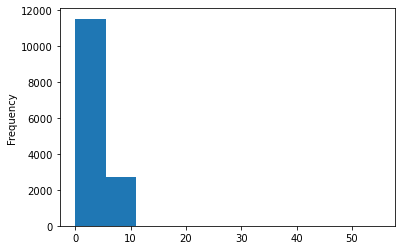

In [243]:
df2['Consumption_comb'].plot(kind = 'hist')

In [244]:
df2['Consumption_city'] = pd.to_numeric(df2['Consumption_city'], errors='coerce') ## BU İŞLEMLE BERABER "[]" ŞEKLİNDE SAYI OLMAYAN DEĞERLERİDE NAN OLARAK ATADI.MÜKEMMEL

<AxesSubplot:ylabel='Frequency'>

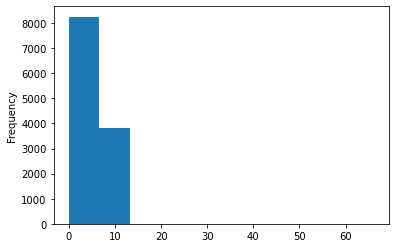

In [245]:
df2['Consumption_city'].plot(kind = 'hist')

In [246]:
df2["Consumption_city"].value_counts(dropna=False)

NaN     2199
5.0      958
5.8      545
4.5      545
4.3      490
        ... 
16.0       1
19.0       1
9.0        1
64.0       1
9.7        1
Name: Consumption_city, Length: 79, dtype: int64

In [247]:
df2["Consumption_city"].mean()

5.830538525269374

In [248]:
for i in  df2[df2['Consumption_city'].isnull()].index:
    try:
       df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Consumption_city'].mode()[0]
        
       df2['Consumption_city'].loc[i] = a
        
    except:
        df2['Consumption_city'].loc[i] =5.8

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\2999139337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Consumption_city'].loc[i] =5.8


In [249]:
df2["Consumption_country"].isnull().sum()

1719

In [250]:
df2['Consumption_country'] = pd.to_numeric(df2['Consumption_country'], errors='coerce') ## BU İŞLEMLE BERABER "[]" ŞEKLİNDE SAYI OLMAYAN DEĞERLERİDE NAN OLARAK ATADI.MÜKEMMEL

In [251]:
df2["Consumption_country"].mean()

4.200053031642194

In [252]:
for i in  df2[df2['Consumption_country'].isnull()].index:
    try:
       df2[(df2['make_model'] == df2['make_model'].loc[i]) & (df2['Price'] == df2['Price'].loc[i]) & (df2['kW '] == df2['kW '].loc[i])]['Consumption_country'].mode()[0]
        
       df2['Consumption_country'].loc[i] = a
        
    except:
        df2['Consumption_country'].loc[i] =4.2

C:\Users\eneso\AppData\Local\Temp\ipykernel_10704\3370602574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Consumption_country'].loc[i] =4.2


In [253]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269 entries, 0 to 15918
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14269 non-null  object 
 1   short_description    14269 non-null  object 
 2   price                14269 non-null  int64  
 3   km                   14269 non-null  float64
 4   Make                 14269 non-null  object 
 5   Previous Owners      14269 non-null  float64
 6   First Registration   14269 non-null  float64
 7   Body Color           14269 non-null  object 
 8   Body                 14269 non-null  object 
 9   Nr. of Doors         14269 non-null  object 
 10  Gearing Type         14269 non-null  object 
 11  Displacement_cc      14269 non-null  object 
 12  Cylinders            14269 non-null  object 
 13  Weight               14269 non-null  object 
 14  Drive chain          14269 non-null  object 
 15  Fuel                 14269 non-null 

In [254]:
df2

,make_model,short_description,price,km,Make,Previous Owners,First Registration,Body Color,Body,Nr. of Doors,...,Displacement_cc,Cylinders,Weight,Drive chain,Fuel,Gears,kW,Consumption_comb,Consumption_city,Consumption_country
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,15770,56013.000000,Audi,2.0,2016.0,Black,Sedans,5,...,1422,3,1220,front,Diesel,5,66.0,3.8,4.3,3.5
1,Audi A1,1.8 TFSI sport,14500,80000.000000,Audi,1.0,2017.0,Red,Sedans,3,...,1798,4,1255,front,Gasoline,7,141.0,5.6,7.1,4.7
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,14640,83450.000000,Audi,2.0,2016.0,Black,Sedans,4,...,1598,4,1163,front,Diesel,5,85.0,3.8,4.4,3.4
3,Audi A1,1.4 TDi Design S tronic,14500,73000.000000,Audi,1.0,2016.0,Brown,Sedans,3,...,1422,3,1195,front,Diesel,6,66.0,3.8,4.3,3.5
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,16790,16200.000000,Audi,1.0,2016.0,Black,Sedans,5,...,1422,3,1163,front,Diesel,5,66.0,4.1,4.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,Renault Espace,INITIALE Paris TCe 225 EDC GPF ACC EU6,39950,1000.000000,Renault,1.0,2019.0,White,Van,5,...,1798,4,1163,front,Gasoline,5,165.0,6.8,8.7,5.7
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,39950,34230.171735,Renault,1.0,2017.0,Grey,Van,5,...,1997,4,1758,front,Diesel,6,147.0,5.3,6.2,4.7
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",39885,9900.000000,Renault,1.0,2019.0,Grey,Van,5,...,1798,4,1708,front,Gasoline,7,165.0,4.8,7.0,4.2
15916,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,39875,15.000000,Renault,1392.0,2019.0,White,Van,5,...,1997,4,1163,front,Diesel,6,146.0,5.3,6.2,4.7
